In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

#fething url
url = 'https://en.wikipedia.org/wiki/List_of_NCAA_college_football_rivalry_games'
response = requests.get(url)


In [34]:
# Check if the request was successful
if response.status_code != 200:
    print("Failed to retrieve the webpage. Status code:", response.status_code)
else:
    #Parsing page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #Finidnig all tables on the wikipedia webpage
    tables = soup.find_all('table', {'class': 'wikitable'})
    print(len(tables))
   
    rivalry_meetings = []




10


In [35]:
rivalries = []
rows = tables[0].find_all('tr')
for row in rows[1:]:
    cols = row.find_all('td')
    
    team1 = cols[2].get_text(strip=True)
    team2 = cols[3].get_text(strip=True)
    games_played = cols[6].get_text(strip=True)
    
    rivalries.append({
        'Team 1': team1,
        'Team 2': team2,
        'Games Played': games_played
    })  

rivalries_df = pd.DataFrame(rivalries)
rivalries_df.at[203, 'Games Played'] = 103


In [48]:
rivalries_df.head(10)

,Team 1,Team 2,Games Played
0,Middle Tennessee,Western Kentucky,74
1,Air Force,Colorado State,62
2,Air Force,Hawaii,23
3,Akron,Kent State,67
4,Alabama,Clemson,19
5,Alabama,Florida,42
6,Alabama,Georgia,74
7,Alabama,Georgia Tech,52
8,Alabama,LSU,89
9,Alabama,Ole Miss,71


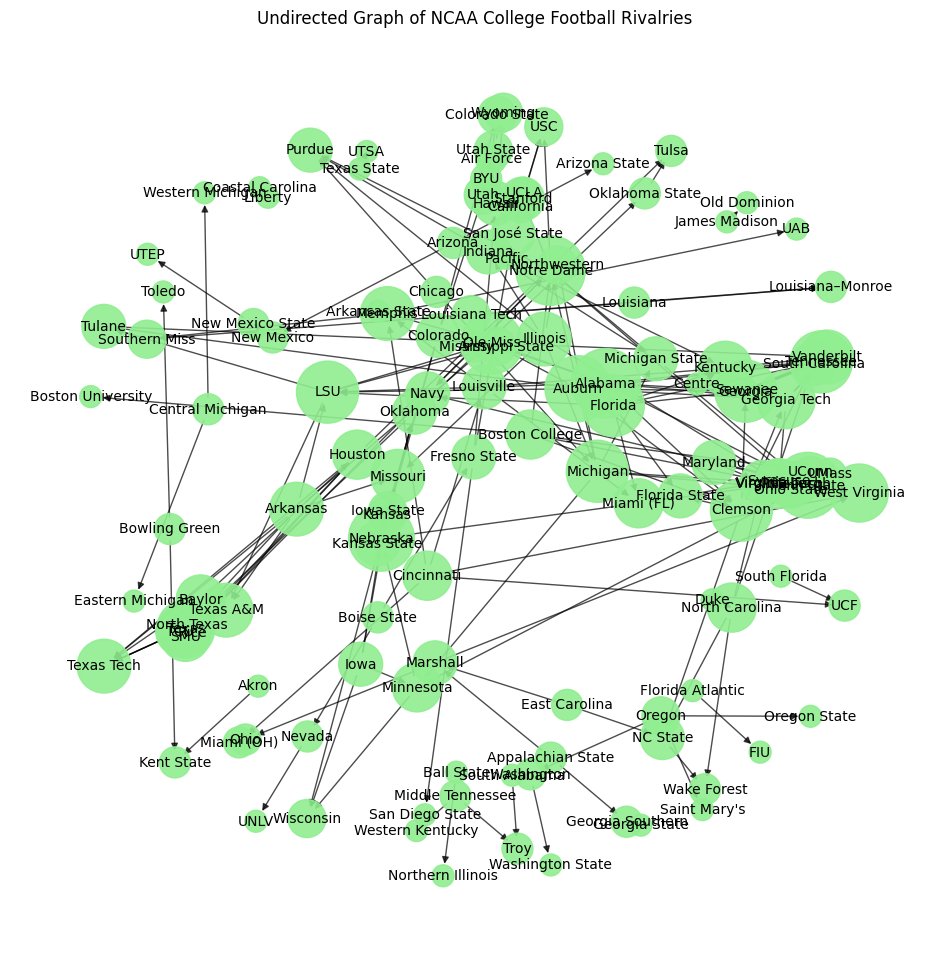

In [39]:
G = nx.DiGraph()
#graph_weights = int(row['Games Played'])
for _, row in rivalries_df.iterrows():
    G.add_edge(row['Team 1'],row['Team 2'], weight = int(row['Games Played']))

degree_dict= dict(G.degree())

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k = 0.2)
nx.draw_networkx_nodes(G, pos, node_size= [v * 250 for v in degree_dict.values()], node_color='lightgreen', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=, alpha=0.7, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Undirected Graph of NCAA College Football Rivalries")
plt.axis('off')
plt.show()

    

In [50]:
sort_deg = dict(sorted(degree_dict.items(), key=lambda item: item[1], reverse=True))
sort_deg

{'Alabama': 10,
 'Notre Dame': 10,
 'Penn State': 9,
 'Auburn': 9,
 'Nebraska': 9,
 'Clemson': 8,
 'Florida': 8,
 'Georgia': 8,
 'LSU': 8,
 'Ole Miss': 8,
 'Tennessee': 8,
 'Michigan': 8,
 'Georgia Tech': 7,
 'Texas': 7,
 'West Virginia': 7,
 'Arkansas': 6,
 'Texas Tech': 6,
 'Memphis': 6,
 'Missouri': 6,
 'Texas A&M': 6,
 'Kentucky': 6,
 'Vanderbilt': 6,
 'Illinois': 6,
 'Cincinnati': 5,
 'SMU': 5,
 'TCU': 5,
 'Baylor': 5,
 'North Carolina': 5,
 'Houston': 5,
 'Boston College': 5,
 'Virginia Tech': 5,
 'Miami (FL)': 5,
 'Minnesota': 5,
 'Hawaii': 4,
 'Navy': 4,
 'Tulane': 4,
 'Pittsburgh': 4,
 'Marshall': 4,
 'Fresno State': 4,
 'San José State': 4,
 'South Carolina': 4,
 'Oklahoma': 4,
 'Stanford': 4,
 'Purdue': 4,
 'Louisville': 4,
 'Florida State': 4,
 'Colorado': 4,
 'Kansas State': 4,
 'Maryland': 4,
 'NC State': 4,
 'Virginia': 4,
 'Indiana': 4,
 'Michigan State': 4,
 'Iowa': 4,
 'Syracuse': 4,
 'Colorado State': 3,
 'Mississippi State': 3,
 'Southern Miss': 3,
 'Utah': 3,
 'Uta

In [ ]:

#pd.set_option("display.max_rows", None)
#rivalries_df

In [40]:
betweenness = nx.betweenness_centrality(G)
betweeness_df = pd.DataFrame(betweenness.items(), columns = ["School", "Betweeness Centrality"]).sort_values(by='Betweeness Centrality', ascending=False)
betweeness_df.head(10)



,School,Betweeness Centrality
89,Nebraska,0.007142
60,Oklahoma,0.006419
98,Miami (FL),0.005436
82,Louisville,0.004222
78,Kentucky,0.003431
24,Notre Dame,0.002747
14,Penn State,0.002689
20,Texas,0.002573
42,Memphis,0.002140
124,Syracuse,0.001908


In [41]:
closeness = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness.items(), columns = ["School", "Closesness Centrality"]).sort_values(by='Closesness Centrality', ascending=False)
closeness_df.head(10)

,School,Closesness Centrality
29,West Virginia,0.114165
101,Vanderbilt,0.087273
89,Nebraska,0.078580
21,Texas Tech,0.076824
20,Texas,0.076153
52,Texas A&M,0.074380
120,USC,0.063131
63,Stanford,0.062937
69,Virginia Tech,0.062156
26,Tennessee,0.061869


In [42]:
degree = nx.degree_centrality(G)
degree_df = pd.DataFrame(degree.items(), columns = ["School", "Degree Centrality"]).sort_values(by='Degree Centrality', ascending=False)
degree_df.head(10)

,School,Degree Centrality
24,Notre Dame,0.075758
7,Alabama,0.075758
89,Nebraska,0.068182
14,Penn State,0.068182
25,Auburn,0.068182
10,Georgia,0.060606
13,Ole Miss,0.060606
12,LSU,0.060606
9,Florida,0.060606
8,Clemson,0.060606


In [54]:
eigenvector = nx.eigenvector_centrality(G, max_iter=100, tol = 0.1e-03)
eigen_df = pd.DataFrame(eigenvector, columns = ["School", "Eigenvector Centrality"]).sort_values(by= "Eigenvector Centrality", ascending=False)

eigen_df.head(10)

#for x in range(5):
  #print(eigenvector[x])



,School,Eigenvector Centrality
